In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
% matplotlib inline

/home/am/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
class ArtificialNeuron:
    def __init__(self,N=2, act_func=tf.nn.sigmoid, learning_rate= 0.001):
        self.N = N # Number of inputs to the neuron
        self.act_fn = act_func
        
        # Build the graph for a single neuron
        self.W = tf.Variable(tf.random_normal([N,1], stddev=2, seed = 0))
        self.bias = tf.Variable(0.0, dtype=tf.float32)
        self.X = tf.placeholder(tf.float32, name='X', shape=[None,N])
        self.y = tf.placeholder(tf.float32, name='Y')
        
        activity = tf.matmul(self.X, self.W) + self.bias
        self.y_hat = self.act_fn(activity)
        
        error = self.y - self.y_hat
        
        self.loss = tf.reduce_mean(tf.square(error))
        self.opt =  tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(self.loss)
        
        init = tf.global_variables_initializer()
        
        self.sess = tf.Session()
        self.sess.run(init)
        
    def train(self, X, Y, X_val, Y_val, epochs=100):
        epoch = 0
        X, Y = shuffle(X,Y)
        loss = []
        loss_val = []
        while epoch < epochs:
            # Run the optimizer for the whole training set batch wise (Stochastic Gradient Descent)    
            _, l = self.sess.run([self.opt,self.loss], feed_dict={self.X: X, self.y: Y})
            l_val = self.sess.run(self.loss, feed_dict={self.X: X_val, self.y: Y_val})
            
            loss.append(l)
            loss_val.append(l_val)
                
            if epoch % 10 == 0:
                print("Epoch {}/{}  training loss: {} Validation loss {}".\
                      format(epoch,epochs,l, l_val ))
               
            epoch += 1
        return loss, loss_val
            
    def predict(self, X):
        return self.sess.run(self.y_hat, feed_dict={self.X: X})

In [3]:
filename = 'Folds5x2_pp.xlsx'
df = pd.read_excel(filename, sheet_name='Sheet1')
X, Y = df[['AT', 'V','AP','RH']], df['PE']
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
target_scaler = MinMaxScaler()
Y_new = target_scaler.fit_transform(Y.values.reshape(-1,1))
X_train, X_val, Y_train, y_val = \
  train_test_split(X_new, Y_new, test_size=0.4, random_state=333)

In [4]:
_, d = X_train.shape
model = ArtificialNeuron(N=d)

In [5]:
loss, loss_val = model.train(X_train, Y_train, X_val, y_val, 30000)

Epoch 0/30000  training loss: 0.28809911012649536 Validation loss 0.2842104136943817
Epoch 10/30000  training loss: 0.28804391622543335 Validation loss 0.28415507078170776
Epoch 20/30000  training loss: 0.28798866271972656 Validation loss 0.2840996980667114
Epoch 30/30000  training loss: 0.2879333794116974 Validation loss 0.2840442359447479
Epoch 40/30000  training loss: 0.28787800669670105 Validation loss 0.28398871421813965
Epoch 50/30000  training loss: 0.28782257437705994 Validation loss 0.28393319249153137
Epoch 60/30000  training loss: 0.28776705265045166 Validation loss 0.28387752175331116
Epoch 70/30000  training loss: 0.2877114713191986 Validation loss 0.2838217616081238
Epoch 80/30000  training loss: 0.28765586018562317 Validation loss 0.2837660014629364
Epoch 90/30000  training loss: 0.2876001000404358 Validation loss 0.2837101221084595
Epoch 100/30000  training loss: 0.2875443696975708 Validation loss 0.28365421295166016
Epoch 110/30000  training loss: 0.28748849034309387 V

Epoch 1000/30000  training loss: 0.2822134494781494 Validation loss 0.2783113121986389
Epoch 1010/30000  training loss: 0.28215059638023376 Validation loss 0.27824831008911133
Epoch 1020/30000  training loss: 0.28208768367767334 Validation loss 0.27818530797958374
Epoch 1030/30000  training loss: 0.28202465176582336 Validation loss 0.2781221568584442
Epoch 1040/30000  training loss: 0.281961590051651 Validation loss 0.2780589461326599
Epoch 1050/30000  training loss: 0.2818984091281891 Validation loss 0.27799567580223083
Epoch 1060/30000  training loss: 0.2818351984024048 Validation loss 0.277932345867157
Epoch 1070/30000  training loss: 0.28177186846733093 Validation loss 0.27786892652511597
Epoch 1080/30000  training loss: 0.2817084789276123 Validation loss 0.2778054177761078
Epoch 1090/30000  training loss: 0.2816450297832489 Validation loss 0.27774184942245483
Epoch 1100/30000  training loss: 0.28158146142959595 Validation loss 0.27767816185951233
Epoch 1110/30000  training loss: 0

Epoch 2030/30000  training loss: 0.2752833664417267 Validation loss 0.27137133479118347
Epoch 2040/30000  training loss: 0.2752113938331604 Validation loss 0.2712993025779724
Epoch 2050/30000  training loss: 0.27513933181762695 Validation loss 0.2712271511554718
Epoch 2060/30000  training loss: 0.27506718039512634 Validation loss 0.2711549401283264
Epoch 2070/30000  training loss: 0.27499493956565857 Validation loss 0.27108266949653625
Epoch 2080/30000  training loss: 0.274922639131546 Validation loss 0.27101027965545654
Epoch 2090/30000  training loss: 0.27485018968582153 Validation loss 0.2709377706050873
Epoch 2100/30000  training loss: 0.2747775614261627 Validation loss 0.2708650529384613
Epoch 2110/30000  training loss: 0.27470487356185913 Validation loss 0.27079224586486816
Epoch 2120/30000  training loss: 0.2746320068836212 Validation loss 0.27071940898895264
Epoch 2130/30000  training loss: 0.2745591104030609 Validation loss 0.27064642310142517
Epoch 2140/30000  training loss: 

Epoch 3020/30000  training loss: 0.2676764726638794 Validation loss 0.2637613117694855
Epoch 3030/30000  training loss: 0.26759448647499084 Validation loss 0.26367929577827454
Epoch 3040/30000  training loss: 0.26751241087913513 Validation loss 0.2635972499847412
Epoch 3050/30000  training loss: 0.2674301862716675 Validation loss 0.26351505517959595
Epoch 3060/30000  training loss: 0.26734793186187744 Validation loss 0.2634327709674835
Epoch 3070/30000  training loss: 0.26726552844047546 Validation loss 0.2633504271507263
Epoch 3080/30000  training loss: 0.2671830654144287 Validation loss 0.26326796412467957
Epoch 3090/30000  training loss: 0.26710045337677 Validation loss 0.26318538188934326
Epoch 3100/30000  training loss: 0.26701778173446655 Validation loss 0.2631027400493622
Epoch 3110/30000  training loss: 0.26693499088287354 Validation loss 0.26301997900009155
Epoch 3120/30000  training loss: 0.26685214042663574 Validation loss 0.26293712854385376
Epoch 3130/30000  training loss:

Epoch 4030/30000  training loss: 0.2588467299938202 Validation loss 0.254938542842865
Epoch 4040/30000  training loss: 0.25875359773635864 Validation loss 0.2548454999923706
Epoch 4050/30000  training loss: 0.25866028666496277 Validation loss 0.25475239753723145
Epoch 4060/30000  training loss: 0.2585669159889221 Validation loss 0.25465911626815796
Epoch 4070/30000  training loss: 0.2584734559059143 Validation loss 0.2545657455921173
Epoch 4080/30000  training loss: 0.25837981700897217 Validation loss 0.2544723153114319
Epoch 4090/30000  training loss: 0.25828614830970764 Validation loss 0.2543787658214569
Epoch 4100/30000  training loss: 0.2581923305988312 Validation loss 0.25428512692451477
Epoch 4110/30000  training loss: 0.25809845328330994 Validation loss 0.2541913688182831
Epoch 4120/30000  training loss: 0.25800439715385437 Validation loss 0.25409749150276184
Epoch 4130/30000  training loss: 0.25791025161743164 Validation loss 0.2540034353733063
Epoch 4140/30000  training loss: 

Epoch 5060/30000  training loss: 0.2486337125301361 Validation loss 0.2447485327720642
Epoch 5070/30000  training loss: 0.24852830171585083 Validation loss 0.2446434497833252
Epoch 5080/30000  training loss: 0.2484227865934372 Validation loss 0.24453827738761902
Epoch 5090/30000  training loss: 0.2483171969652176 Validation loss 0.2444329857826233
Epoch 5100/30000  training loss: 0.24821145832538605 Validation loss 0.2443275898694992
Epoch 5110/30000  training loss: 0.24810561537742615 Validation loss 0.24422207474708557
Epoch 5120/30000  training loss: 0.2479996681213379 Validation loss 0.24411647021770477
Epoch 5130/30000  training loss: 0.24789360165596008 Validation loss 0.24401076138019562
Epoch 5140/30000  training loss: 0.2477874606847763 Validation loss 0.2439049631357193
Epoch 5150/30000  training loss: 0.24768120050430298 Validation loss 0.24379903078079224
Epoch 5160/30000  training loss: 0.2475748211145401 Validation loss 0.24369297921657562
Epoch 5170/30000  training loss:

Epoch 6040/30000  training loss: 0.23773686587810516 Validation loss 0.23389507830142975
Epoch 6050/30000  training loss: 0.23761968314647675 Validation loss 0.2337784767150879
Epoch 6060/30000  training loss: 0.23750239610671997 Validation loss 0.23366177082061768
Epoch 6070/30000  training loss: 0.23738503456115723 Validation loss 0.23354500532150269
Epoch 6080/30000  training loss: 0.23726750910282135 Validation loss 0.23342804610729218
Epoch 6090/30000  training loss: 0.2371499091386795 Validation loss 0.23331105709075928
Epoch 6100/30000  training loss: 0.2370322197675705 Validation loss 0.23319396376609802
Epoch 6110/30000  training loss: 0.2369144707918167 Validation loss 0.2330767959356308
Epoch 6120/30000  training loss: 0.2367965430021286 Validation loss 0.23295949399471283
Epoch 6130/30000  training loss: 0.23667854070663452 Validation loss 0.23284205794334412
Epoch 6140/30000  training loss: 0.23656043410301208 Validation loss 0.23272456228733063
Epoch 6150/30000  training 

Epoch 7090/30000  training loss: 0.2248183786869049 Validation loss 0.2210550755262375
Epoch 7100/30000  training loss: 0.22468963265419006 Validation loss 0.22092723846435547
Epoch 7110/30000  training loss: 0.2245607227087021 Validation loss 0.22079923748970032
Epoch 7120/30000  training loss: 0.22443163394927979 Validation loss 0.22067110240459442
Epoch 7130/30000  training loss: 0.22430245578289032 Validation loss 0.22054292261600494
Epoch 7140/30000  training loss: 0.22417326271533966 Validation loss 0.2204146534204483
Epoch 7150/30000  training loss: 0.22404396533966064 Validation loss 0.2202863097190857
Epoch 7160/30000  training loss: 0.22391454875469208 Validation loss 0.22015786170959473
Epoch 7170/30000  training loss: 0.22378504276275635 Validation loss 0.2200292944908142
Epoch 7180/30000  training loss: 0.22365540266036987 Validation loss 0.21990063786506653
Epoch 7190/30000  training loss: 0.22352562844753265 Validation loss 0.21977181732654572
Epoch 7200/30000  training 

Epoch 8040/30000  training loss: 0.2121553122997284 Validation loss 0.20849955081939697
Epoch 8050/30000  training loss: 0.21201784908771515 Validation loss 0.2083633989095688
Epoch 8060/30000  training loss: 0.21188026666641235 Validation loss 0.20822720229625702
Epoch 8070/30000  training loss: 0.21174265444278717 Validation loss 0.20809093117713928
Epoch 8080/30000  training loss: 0.2116049975156784 Validation loss 0.20795464515686035
Epoch 8090/30000  training loss: 0.21146729588508606 Validation loss 0.20781832933425903
Epoch 8100/30000  training loss: 0.21132953464984894 Validation loss 0.20768189430236816
Epoch 8110/30000  training loss: 0.2111915647983551 Validation loss 0.20754529535770416
Epoch 8120/30000  training loss: 0.2110535353422165 Validation loss 0.20740865170955658
Epoch 8130/30000  training loss: 0.2109154611825943 Validation loss 0.2072719931602478
Epoch 8140/30000  training loss: 0.21077735722064972 Validation loss 0.20713527500629425
Epoch 8150/30000  training l

Epoch 9050/30000  training loss: 0.19795109331607819 Validation loss 0.19445548951625824
Epoch 9060/30000  training loss: 0.19780781865119934 Validation loss 0.19431406259536743
Epoch 9070/30000  training loss: 0.19766458868980408 Validation loss 0.1941726803779602
Epoch 9080/30000  training loss: 0.19752132892608643 Validation loss 0.19403129816055298
Epoch 9090/30000  training loss: 0.19737809896469116 Validation loss 0.19388991594314575
Epoch 9100/30000  training loss: 0.19723482429981232 Validation loss 0.19374850392341614
Epoch 9110/30000  training loss: 0.19709156453609467 Validation loss 0.19360709190368652
Epoch 9120/30000  training loss: 0.19694820046424866 Validation loss 0.19346565008163452
Epoch 9130/30000  training loss: 0.19680479168891907 Validation loss 0.19332407414913177
Epoch 9140/30000  training loss: 0.1966613084077835 Validation loss 0.19318248331546783
Epoch 9150/30000  training loss: 0.19651785492897034 Validation loss 0.1930408626794815
Epoch 9160/30000  traini

Epoch 10050/30000  training loss: 0.18354398012161255 Validation loss 0.18025796115398407
Epoch 10060/30000  training loss: 0.18339988589286804 Validation loss 0.18011625111103058
Epoch 10070/30000  training loss: 0.1832558661699295 Validation loss 0.17997458577156067
Epoch 10080/30000  training loss: 0.18311187624931335 Validation loss 0.17983295023441315
Epoch 10090/30000  training loss: 0.18296778202056885 Validation loss 0.17969121038913727
Epoch 10100/30000  training loss: 0.18282368779182434 Validation loss 0.17954950034618378
Epoch 10110/30000  training loss: 0.18267962336540222 Validation loss 0.17940780520439148
Epoch 10120/30000  training loss: 0.1825355589389801 Validation loss 0.17926612496376038
Epoch 10130/30000  training loss: 0.18239155411720276 Validation loss 0.17912453413009644
Epoch 10140/30000  training loss: 0.182247593998909 Validation loss 0.1789829432964325
Epoch 10150/30000  training loss: 0.18210366368293762 Validation loss 0.17884142696857452
Epoch 10160/300

Epoch 11080/30000  training loss: 0.16888777911663055 Validation loss 0.16586963832378387
Epoch 11090/30000  training loss: 0.16874822974205017 Validation loss 0.16573293507099152
Epoch 11100/30000  training loss: 0.16860873997211456 Validation loss 0.16559629142284393
Epoch 11110/30000  training loss: 0.1684693694114685 Validation loss 0.1654597371816635
Epoch 11120/30000  training loss: 0.16833007335662842 Validation loss 0.16532328724861145
Epoch 11130/30000  training loss: 0.1681908518075943 Validation loss 0.16518692672252655
Epoch 11140/30000  training loss: 0.16805168986320496 Validation loss 0.16505064070224762
Epoch 11150/30000  training loss: 0.16791264712810516 Validation loss 0.16491444408893585
Epoch 11160/30000  training loss: 0.16777366399765015 Validation loss 0.16477833688259125
Epoch 11170/30000  training loss: 0.1676347851753235 Validation loss 0.164642333984375
Epoch 11180/30000  training loss: 0.167495995759964 Validation loss 0.16450640559196472
Epoch 11190/30000 

Epoch 12070/30000  training loss: 0.1555124968290329 Validation loss 0.15279357135295868
Epoch 12080/30000  training loss: 0.15538257360458374 Validation loss 0.1526668518781662
Epoch 12090/30000  training loss: 0.15525275468826294 Validation loss 0.15254023671150208
Epoch 12100/30000  training loss: 0.1551230549812317 Validation loss 0.15241371095180511
Epoch 12110/30000  training loss: 0.15499348938465118 Validation loss 0.15228736400604248
Epoch 12120/30000  training loss: 0.15486402809619904 Validation loss 0.152161106467247
Epoch 12130/30000  training loss: 0.15473470091819763 Validation loss 0.1520349681377411
Epoch 12140/30000  training loss: 0.15460547804832458 Validation loss 0.15190894901752472
Epoch 12150/30000  training loss: 0.15447638928890228 Validation loss 0.1517830491065979
Epoch 12160/30000  training loss: 0.15434738993644714 Validation loss 0.15165728330612183
Epoch 12170/30000  training loss: 0.15421852469444275 Validation loss 0.1515316218137741
Epoch 12180/30000 

Epoch 12990/30000  training loss: 0.144105464220047 Validation loss 0.14168941974639893
Epoch 13000/30000  training loss: 0.14398805797100067 Validation loss 0.14157533645629883
Epoch 13010/30000  training loss: 0.1438707858324051 Validation loss 0.14146144688129425
Epoch 13020/30000  training loss: 0.14375369250774384 Validation loss 0.1413477212190628
Epoch 13030/30000  training loss: 0.14363674819469452 Validation loss 0.1412341445684433
Epoch 13040/30000  training loss: 0.14351992309093475 Validation loss 0.14112070202827454
Epoch 13050/30000  training loss: 0.14340324699878693 Validation loss 0.14100739359855652
Epoch 13060/30000  training loss: 0.14328670501708984 Validation loss 0.14089423418045044
Epoch 13070/30000  training loss: 0.1431702971458435 Validation loss 0.1407812088727951
Epoch 13080/30000  training loss: 0.1430540233850479 Validation loss 0.14066830277442932
Epoch 13090/30000  training loss: 0.14293792843818665 Validation loss 0.14055559039115906
Epoch 13100/30000 

Epoch 14010/30000  training loss: 0.13292323052883148 Validation loss 0.13085366785526276
Epoch 14020/30000  training loss: 0.13282179832458496 Validation loss 0.13075564801692963
Epoch 14030/30000  training loss: 0.13272058963775635 Validation loss 0.13065779209136963
Epoch 14040/30000  training loss: 0.13261950016021729 Validation loss 0.13056011497974396
Epoch 14050/30000  training loss: 0.13251855969429016 Validation loss 0.13046255707740784
Epoch 14060/30000  training loss: 0.13241775333881378 Validation loss 0.13036514818668365
Epoch 14070/30000  training loss: 0.13231709599494934 Validation loss 0.1302678883075714
Epoch 14080/30000  training loss: 0.1322166472673416 Validation loss 0.1301708072423935
Epoch 14090/30000  training loss: 0.13211634755134583 Validation loss 0.1300739198923111
Epoch 14100/30000  training loss: 0.13201630115509033 Validation loss 0.1299772709608078
Epoch 14110/30000  training loss: 0.13191640377044678 Validation loss 0.12988075613975525
Epoch 14120/300

Epoch 14990/30000  training loss: 0.12375985831022263 Validation loss 0.12201724201440811
Epoch 15000/30000  training loss: 0.12367437034845352 Validation loss 0.12193502485752106
Epoch 15010/30000  training loss: 0.12358909845352173 Validation loss 0.12185299396514893
Epoch 15020/30000  training loss: 0.12350396066904068 Validation loss 0.12177108973264694
Epoch 15030/30000  training loss: 0.12341893464326859 Validation loss 0.1216893196105957
Epoch 15040/30000  training loss: 0.12333410978317261 Validation loss 0.12160774320363998
Epoch 15050/30000  training loss: 0.12324941903352737 Validation loss 0.12152627855539322
Epoch 15060/30000  training loss: 0.12316486239433289 Validation loss 0.12144496291875839
Epoch 15070/30000  training loss: 0.12308042496442795 Validation loss 0.12136377394199371
Epoch 15080/30000  training loss: 0.12299617379903793 Validation loss 0.12128276377916336
Epoch 15090/30000  training loss: 0.12291206419467926 Validation loss 0.12120188772678375
Epoch 15100

Epoch 15980/30000  training loss: 0.11604667454957962 Validation loss 0.11461427062749863
Epoch 15990/30000  training loss: 0.11597621440887451 Validation loss 0.11454680562019348
Epoch 16000/30000  training loss: 0.11590595543384552 Validation loss 0.11447954177856445
Epoch 16010/30000  training loss: 0.11583583801984787 Validation loss 0.11441241949796677
Epoch 16020/30000  training loss: 0.11576584726572037 Validation loss 0.11434540152549744
Epoch 16030/30000  training loss: 0.1156960055232048 Validation loss 0.11427854746580124
Epoch 16040/30000  training loss: 0.11562629789113998 Validation loss 0.11421181261539459
Epoch 16050/30000  training loss: 0.11555667221546173 Validation loss 0.11414516717195511
Epoch 16060/30000  training loss: 0.11548720300197601 Validation loss 0.11407867074012756
Epoch 16070/30000  training loss: 0.11541788280010223 Validation loss 0.11401232331991196
Epoch 16080/30000  training loss: 0.1153487041592598 Validation loss 0.1139461100101471
Epoch 16090/3

Epoch 16990/30000  training loss: 0.10961965471506119 Validation loss 0.10847312211990356
Epoch 17000/30000  training loss: 0.10956258326768875 Validation loss 0.10841871052980423
Epoch 17010/30000  training loss: 0.10950561612844467 Validation loss 0.10836439579725266
Epoch 17020/30000  training loss: 0.10944873094558716 Validation loss 0.10831016302108765
Epoch 17030/30000  training loss: 0.10939200967550278 Validation loss 0.10825609415769577
Epoch 17040/30000  training loss: 0.10933535546064377 Validation loss 0.10820208489894867
Epoch 17050/30000  training loss: 0.1092788502573967 Validation loss 0.10814821720123291
Epoch 17060/30000  training loss: 0.10922251641750336 Validation loss 0.10809451341629028
Epoch 17070/30000  training loss: 0.10916630923748016 Validation loss 0.10804092884063721
Epoch 17080/30000  training loss: 0.10911020636558533 Validation loss 0.10798744857311249
Epoch 17090/30000  training loss: 0.10905417054891586 Validation loss 0.10793404281139374
Epoch 17100

Epoch 18000/30000  training loss: 0.10442113876342773 Validation loss 0.10352452844381332
Epoch 18010/30000  training loss: 0.10437502712011337 Validation loss 0.10348070412874222
Epoch 18020/30000  training loss: 0.10432899743318558 Validation loss 0.10343696177005768
Epoch 18030/30000  training loss: 0.10428304225206375 Validation loss 0.10339327901601791
Epoch 18040/30000  training loss: 0.10423717647790909 Validation loss 0.1033497080206871
Epoch 18050/30000  training loss: 0.10419141501188278 Validation loss 0.10330621153116226
Epoch 18060/30000  training loss: 0.10414571315050125 Validation loss 0.10326278209686279
Epoch 18070/30000  training loss: 0.1041000708937645 Validation loss 0.1032194122672081
Epoch 18080/30000  training loss: 0.10405458509922028 Validation loss 0.10317618399858475
Epoch 18090/30000  training loss: 0.1040092259645462 Validation loss 0.10313308984041214
Epoch 18100/30000  training loss: 0.10396397113800049 Validation loss 0.1030900850892067
Epoch 18110/300

Epoch 18950/30000  training loss: 0.10043377429246902 Validation loss 0.09973849356174469
Epoch 18960/30000  training loss: 0.10039571672677994 Validation loss 0.0997023805975914
Epoch 18970/30000  training loss: 0.10035772621631622 Validation loss 0.09966632723808289
Epoch 18980/30000  training loss: 0.1003197729587555 Validation loss 0.09963033348321915
Epoch 18990/30000  training loss: 0.10028201341629028 Validation loss 0.09959452599287033
Epoch 19000/30000  training loss: 0.10024431347846985 Validation loss 0.0995587408542633
Epoch 19010/30000  training loss: 0.10020666569471359 Validation loss 0.09952302277088165
Epoch 19020/30000  training loss: 0.10016907006502151 Validation loss 0.09948734939098358
Epoch 19030/30000  training loss: 0.1001315638422966 Validation loss 0.09945176541805267
Epoch 19040/30000  training loss: 0.10009410232305527 Validation loss 0.09941623359918594
Epoch 19050/30000  training loss: 0.1000567078590393 Validation loss 0.09938075393438339
Epoch 19060/300

Epoch 19950/30000  training loss: 0.0969695970416069 Validation loss 0.096452496945858
Epoch 19960/30000  training loss: 0.0969381183385849 Validation loss 0.09642264246940613
Epoch 19970/30000  training loss: 0.09690670669078827 Validation loss 0.09639285504817963
Epoch 19980/30000  training loss: 0.09687536209821701 Validation loss 0.09636310487985611
Epoch 19990/30000  training loss: 0.09684404730796814 Validation loss 0.09633339941501617
Epoch 20000/30000  training loss: 0.09681277722120285 Validation loss 0.09630371630191803
Epoch 20010/30000  training loss: 0.09678152203559875 Validation loss 0.09627407044172287
Epoch 20020/30000  training loss: 0.09675035625696182 Validation loss 0.09624449908733368
Epoch 20030/30000  training loss: 0.09671923518180847 Validation loss 0.09621497243642807
Epoch 20040/30000  training loss: 0.09668819606304169 Validation loss 0.09618555009365082
Epoch 20050/30000  training loss: 0.09665723145008087 Validation loss 0.09615615755319595
Epoch 20060/30

Epoch 21000/30000  training loss: 0.09394168853759766 Validation loss 0.09357789158821106
Epoch 21010/30000  training loss: 0.09391526132822037 Validation loss 0.09355276823043823
Epoch 21020/30000  training loss: 0.09388891607522964 Validation loss 0.09352772682905197
Epoch 21030/30000  training loss: 0.0938626155257225 Validation loss 0.09350273758172989
Epoch 21040/30000  training loss: 0.09383636713027954 Validation loss 0.0934777781367302
Epoch 21050/30000  training loss: 0.09381014108657837 Validation loss 0.09345285594463348
Epoch 21060/30000  training loss: 0.09378394484519958 Validation loss 0.09342794120311737
Epoch 21070/30000  training loss: 0.093757763504982 Validation loss 0.09340304136276245
Epoch 21080/30000  training loss: 0.09373162686824799 Validation loss 0.09337820112705231
Epoch 21090/30000  training loss: 0.09370553493499756 Validation loss 0.09335339814424515
Epoch 21100/30000  training loss: 0.09367945790290833 Validation loss 0.09332861006259918
Epoch 21110/30

Epoch 21980/30000  training loss: 0.09153048694133759 Validation loss 0.09128241240978241
Epoch 21990/30000  training loss: 0.09150752425193787 Validation loss 0.09126047790050507
Epoch 22000/30000  training loss: 0.09148461371660233 Validation loss 0.09123865514993668
Epoch 22010/30000  training loss: 0.09146174788475037 Validation loss 0.09121683239936829
Epoch 22020/30000  training loss: 0.09143893420696259 Validation loss 0.09119507670402527
Epoch 22030/30000  training loss: 0.091416135430336 Validation loss 0.09117331355810165
Epoch 22040/30000  training loss: 0.0913933515548706 Validation loss 0.09115158021450043
Epoch 22050/30000  training loss: 0.0913705825805664 Validation loss 0.0911298617720604
Epoch 22060/30000  training loss: 0.0913478434085846 Validation loss 0.09110815078020096
Epoch 22070/30000  training loss: 0.09132511913776398 Validation loss 0.09108646214008331
Epoch 22080/30000  training loss: 0.09130243957042694 Validation loss 0.09106481075286865
Epoch 22090/3000

Epoch 22950/30000  training loss: 0.08943194150924683 Validation loss 0.08927612751722336
Epoch 22960/30000  training loss: 0.08941152691841125 Validation loss 0.08925653249025345
Epoch 22970/30000  training loss: 0.08939111232757568 Validation loss 0.08923696726560593
Epoch 22980/30000  training loss: 0.08937069773674011 Validation loss 0.08921739459037781
Epoch 22990/30000  training loss: 0.08935029059648514 Validation loss 0.08919783681631088
Epoch 23000/30000  training loss: 0.08932997286319733 Validation loss 0.08917837589979172
Epoch 23010/30000  training loss: 0.0893096849322319 Validation loss 0.08915890753269196
Epoch 23020/30000  training loss: 0.08928939700126648 Validation loss 0.08913946151733398
Epoch 23030/30000  training loss: 0.08926916122436523 Validation loss 0.0891200602054596
Epoch 23040/30000  training loss: 0.08924892544746399 Validation loss 0.08910065144300461
Epoch 23050/30000  training loss: 0.08922869712114334 Validation loss 0.08908125758171082
Epoch 23060/

Epoch 23950/30000  training loss: 0.08748800307512283 Validation loss 0.0874076634645462
Epoch 23960/30000  training loss: 0.0874694362282753 Validation loss 0.08738977462053299
Epoch 23970/30000  training loss: 0.08745090663433075 Validation loss 0.08737190812826157
Epoch 23980/30000  training loss: 0.0874323919415474 Validation loss 0.08735404908657074
Epoch 23990/30000  training loss: 0.08741389214992523 Validation loss 0.0873362123966217
Epoch 24000/30000  training loss: 0.08739539980888367 Validation loss 0.08731838315725327
Epoch 24010/30000  training loss: 0.08737697452306747 Validation loss 0.0873006209731102
Epoch 24020/30000  training loss: 0.08735856413841248 Validation loss 0.08728285878896713
Epoch 24030/30000  training loss: 0.08734015375375748 Validation loss 0.08726511150598526
Epoch 24040/30000  training loss: 0.08732175081968307 Validation loss 0.08724736422300339
Epoch 24050/30000  training loss: 0.08730339258909225 Validation loss 0.0872296616435051
Epoch 24060/3000

Epoch 24920/30000  training loss: 0.08575862646102905 Validation loss 0.08573563396930695
Epoch 24930/30000  training loss: 0.08574144542217255 Validation loss 0.08571897447109222
Epoch 24940/30000  training loss: 0.08572427183389664 Validation loss 0.0857023075222969
Epoch 24950/30000  training loss: 0.08570708334445953 Validation loss 0.08568565547466278
Epoch 24960/30000  training loss: 0.08568991720676422 Validation loss 0.08566900342702866
Epoch 24970/30000  training loss: 0.08567275106906891 Validation loss 0.08565234392881393
Epoch 24980/30000  training loss: 0.08565561473369598 Validation loss 0.0856357291340828
Epoch 24990/30000  training loss: 0.08563849329948425 Validation loss 0.08561911433935165
Epoch 25000/30000  training loss: 0.08562136441469193 Validation loss 0.08560249954462051
Epoch 25010/30000  training loss: 0.08560430258512497 Validation loss 0.08558595925569534
Epoch 25020/30000  training loss: 0.0855872705578804 Validation loss 0.08556941896677017
Epoch 25030/3

Epoch 25910/30000  training loss: 0.08411074429750443 Validation loss 0.08413295447826385
Epoch 25920/30000  training loss: 0.0840945765376091 Validation loss 0.08411717414855957
Epoch 25930/30000  training loss: 0.08407841622829437 Validation loss 0.08410141617059708
Epoch 25940/30000  training loss: 0.08406224846839905 Validation loss 0.08408564329147339
Epoch 25950/30000  training loss: 0.08404608815908432 Validation loss 0.0840698853135109
Epoch 25960/30000  training loss: 0.08402994275093079 Validation loss 0.084054134786129
Epoch 25970/30000  training loss: 0.08401382714509964 Validation loss 0.0840383917093277
Epoch 25980/30000  training loss: 0.08399773389101028 Validation loss 0.08402270823717117
Epoch 25990/30000  training loss: 0.08398168534040451 Validation loss 0.08400703221559525
Epoch 26000/30000  training loss: 0.08396563678979874 Validation loss 0.08399137109518051
Epoch 26010/30000  training loss: 0.08394959568977356 Validation loss 0.08397572487592697
Epoch 26020/300

Epoch 26920/30000  training loss: 0.08252103626728058 Validation loss 0.08257798105478287
Epoch 26930/30000  training loss: 0.08250570297241211 Validation loss 0.08256293833255768
Epoch 26940/30000  training loss: 0.08249036222696304 Validation loss 0.08254789561033249
Epoch 26950/30000  training loss: 0.08247502893209457 Validation loss 0.0825328528881073
Epoch 26960/30000  training loss: 0.0824596956372261 Validation loss 0.0825178250670433
Epoch 26970/30000  training loss: 0.08244437724351883 Validation loss 0.08250278234481812
Epoch 26980/30000  training loss: 0.08242904394865036 Validation loss 0.08248773962259293
Epoch 26990/30000  training loss: 0.08241371810436249 Validation loss 0.08247269690036774
Epoch 27000/30000  training loss: 0.0823984146118164 Validation loss 0.08245769143104553
Epoch 27010/30000  training loss: 0.08238312602043152 Validation loss 0.08244268596172333
Epoch 27020/30000  training loss: 0.08236782252788544 Validation loss 0.08242767304182053
Epoch 27030/30

Epoch 27980/30000  training loss: 0.08092834055423737 Validation loss 0.08101177215576172
Epoch 27990/30000  training loss: 0.08091363310813904 Validation loss 0.0809972733259201
Epoch 28000/30000  training loss: 0.08089893311262131 Validation loss 0.08098278939723969
Epoch 28010/30000  training loss: 0.08088423311710358 Validation loss 0.08096828311681747
Epoch 28020/30000  training loss: 0.08086954057216644 Validation loss 0.08095380663871765
Epoch 28030/30000  training loss: 0.0808548554778099 Validation loss 0.08093932271003723
Epoch 28040/30000  training loss: 0.08084017038345337 Validation loss 0.08092484623193741
Epoch 28050/30000  training loss: 0.08082547783851624 Validation loss 0.08091036230325699
Epoch 28060/30000  training loss: 0.0808107927441597 Validation loss 0.08089586347341537
Epoch 28070/30000  training loss: 0.08079610764980316 Validation loss 0.08088138699531555
Epoch 28080/30000  training loss: 0.08078144490718842 Validation loss 0.08086691051721573
Epoch 28090/3

Epoch 28920/30000  training loss: 0.07956698536872864 Validation loss 0.07966702431440353
Epoch 28930/30000  training loss: 0.07955274730920792 Validation loss 0.07965292036533356
Epoch 28940/30000  training loss: 0.0795384868979454 Validation loss 0.07963880896568298
Epoch 28950/30000  training loss: 0.07952424138784409 Validation loss 0.0796247124671936
Epoch 28960/30000  training loss: 0.07950999587774277 Validation loss 0.07961060106754303
Epoch 28970/30000  training loss: 0.07949575036764145 Validation loss 0.07959651201963425
Epoch 28980/30000  training loss: 0.07948149740695953 Validation loss 0.07958240061998367
Epoch 28990/30000  training loss: 0.07946726679801941 Validation loss 0.0795683041214943
Epoch 29000/30000  training loss: 0.07945302873849869 Validation loss 0.07955421507358551
Epoch 29010/30000  training loss: 0.07943878322839737 Validation loss 0.07954011112451553
Epoch 29020/30000  training loss: 0.07942456752061844 Validation loss 0.07952604442834854
Epoch 29030/3

Epoch 29910/30000  training loss: 0.07817532867193222 Validation loss 0.0782872661948204
Epoch 29920/30000  training loss: 0.07816149294376373 Validation loss 0.07827351987361908
Epoch 29930/30000  training loss: 0.07814767211675644 Validation loss 0.07825978845357895
Epoch 29940/30000  training loss: 0.07813384383916855 Validation loss 0.07824604958295822
Epoch 29950/30000  training loss: 0.07812002301216125 Validation loss 0.0782323107123375
Epoch 29960/30000  training loss: 0.07810619473457336 Validation loss 0.07821858674287796
Epoch 29970/30000  training loss: 0.07809237390756607 Validation loss 0.07820484787225723
Epoch 29980/30000  training loss: 0.07807855308055878 Validation loss 0.0781911313533783
Epoch 29990/30000  training loss: 0.07806473225355148 Validation loss 0.07817739993333817


Text(0,0.5,'Mean Square Error')

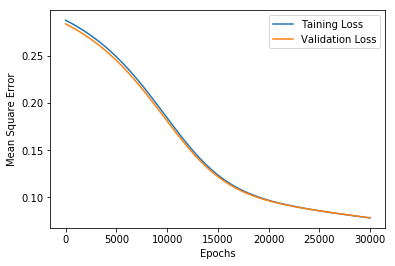

In [6]:
plt.plot(loss, label="Taining Loss")
plt.plot(loss_val, label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Mean Square Error")